In [114]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [115]:
#Reading Data File
ds = pd.read_csv('D:\BankNote_Authentication.csv')
print(ds)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [116]:
#Num of rows and columns of the dataset.
ds.shape

(1372, 5)

In [117]:
##Printing the first 5 rows of the dataset.
ds.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [118]:
##Statistical Analysis.
ds.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [119]:
ds.groupby('class').mean()

,variance,skewness,curtosis,entropy
class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [120]:
#Assign the features to X and class to Y.
X = ds.drop('class', axis=1)
Y = ds['class']
print( X)

      variance  skewness  curtosis  entropy
0      3.62160   8.66610   -2.8073 -0.44699
1      4.54590   8.16740   -2.4586 -1.46210
2      3.86600  -2.63830    1.9242  0.10645
3      3.45660   9.52280   -4.0112 -3.59440
4      0.32924  -4.45520    4.5718 -0.98880
...        ...       ...       ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949
1368  -1.38870  -4.87730    6.4774  0.34179
1369  -3.75030 -13.45860   17.5932 -2.77710
1370  -3.56370  -8.38270   12.3930 -1.28230
1371  -2.54190  -0.65804    2.6842  1.19520

[1372 rows x 4 columns]


# Experiment with a fixed train_test split ratio:               

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)  # 25% training and 75% testing.
print(X_train.shape[0])
print(X_test.shape[0])

343
1029


**Building Decision Tree Model**                

In [122]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train )

In [123]:
#predtiction on testing dataset                                                     
y_pred = clf.predict(X_test)

**Evaluating Model**

In [124]:
# Model Accuracy, how often is the classifier correct.
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9659863945578231


In [125]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[570  14]
 [ 21 424]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       584
           1       0.97      0.95      0.96       445

    accuracy                           0.97      1029
   macro avg       0.97      0.96      0.97      1029
weighted avg       0.97      0.97      0.97      1029



# Experiment with a range of train_test split ratio[30% - 70%]:

In [134]:
#Array_Accuracy= []
#Array_Size= []
testSize = [0.3,0.4,0.5,0.6,0.7]

for s in testSize:
    print("If Train Size = " + str(s))
    Accuracy_Array=[]  
    NODES_Array=[]         

    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=s, random_state= i)
        X_train.shape, X_test.shape, y_train.shape, y_test.shape

        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)

        y_test_pred = clf.predict(X_test)
        #Vailid accuracy 
        Accuracy_VAL = metrics.accuracy_score(y_test, y_test_pred)

        Accuracy_Array.append(Accuracy_VAL)
        NODES_Array.append(clf.tree_.node_count)
        print("Accuracy = {} , Tree Size = {}".format(round(Accuracy_VAL,2),clf.tree_.node_count))
    Array_Accuracy.append(np.mean(Accuracy_Array)*100)
    Array_Size.append(np.mean(NODES_Array))
    print(f"Min Accuracy = {round(np.min(Accuracy_Array)*100,2)} , Max Accuracy = {round(np.max(Accuracy_Array)*100,2)} , Mean Accuracy = {round(np.mean(Accuracy_Array)*100,2)}")
    print(f"Min Tree Size = {np.min(NODES_Array)} , Max Tree Size = {np.max(NODES_Array)} , Mean Tree Size = {np.mean(NODES_Array)}\n")

    #print("Accuracy = {} , Tree Size = {}".format(round(Accuracy_VAL,2),clf.tree_.node_count))

If Train Size = 0.3
Accuracy = 0.98 , Tree Size = 43
Accuracy = 0.98 , Tree Size = 51
Accuracy = 0.98 , Tree Size = 55
Accuracy = 0.98 , Tree Size = 45
Accuracy = 0.99 , Tree Size = 51
Min Accuracy = 97.57 , Max Accuracy = 98.79 , Mean Accuracy = 98.06
Min Tree Size = 43 , Max Tree Size = 55 , Mean Tree Size = 49.0

If Train Size = 0.4
Accuracy = 0.98 , Tree Size = 45
Accuracy = 0.99 , Tree Size = 35
Accuracy = 0.97 , Tree Size = 43
Accuracy = 0.97 , Tree Size = 49
Accuracy = 0.98 , Tree Size = 49
Min Accuracy = 97.27 , Max Accuracy = 98.91 , Mean Accuracy = 97.92
Min Tree Size = 35 , Max Tree Size = 49 , Mean Tree Size = 44.2

If Train Size = 0.5
Accuracy = 0.97 , Tree Size = 47
Accuracy = 0.98 , Tree Size = 33
Accuracy = 0.98 , Tree Size = 35
Accuracy = 0.97 , Tree Size = 51
Accuracy = 0.96 , Tree Size = 49
Min Accuracy = 96.36 , Max Accuracy = 97.96 , Mean Accuracy = 97.29
Min Tree Size = 33 , Max Tree Size = 51 , Mean Tree Size = 43.0

If Train Size = 0.6
Accuracy = 0.98 , Tree Siz

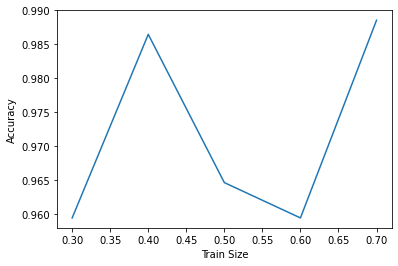

In [131]:
plt.plot(testSize,Accuracy_Array)

plt.xlabel("Train Size")
plt.ylabel("Accuracy")

plt.show()

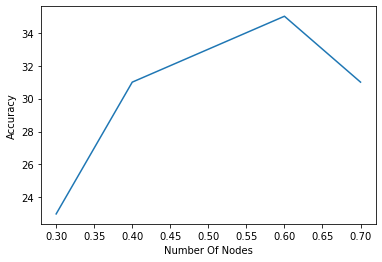

In [132]:
plt.plot(testSize,NODES_Array)

plt.xlabel("Number Of Nodes")
plt.ylabel("Accuracy")

plt.show()